<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

# Financial Time Series

In [1]:
import warnings
warnings.simplefilter('ignore')

## pandas Basics

In [3]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [12]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index=['a', 'b', 'c', 'd'], dtype='int32')
df

,numbers
a,10
b,20
c,30
d,40


In [6]:
df.index # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [13]:
df.ix['d']

numbers    40
Name: d, dtype: int32

In [8]:
df.columns # the column names


Index([u'numbers'], dtype='object')

In [15]:
df.ix['c'] # selection via index

numbers    30
Name: c, dtype: int32

In [16]:
df.ix[['a', 'd']] # selection of multiple indices

,numbers
a,10
d,40


In [17]:
df.ix[1:3]

,numbers
b,20
c,30


In [18]:
df.ix[df.index[1:3]] #seleciton via Index object

,numbers
b,20
c,30


In [22]:
df.sum() # sum per column

numbers    100
dtype: int64

In [21]:
df.ix[3]

numbers    40
Name: d, dtype: int32

In [24]:
df.apply(lambda x: x**2) # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [25]:
df

,numbers
a,10
b,20
c,30
d,40


In [26]:
df**2

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [27]:
df

,numbers
a,10
b,20
c,30
d,40


In [28]:
df['numbers']

a    10
b    20
c    30
d    40
Name: numbers, dtype: int32

In [30]:
df['floats'] = (1.5, 2.5, 3.5, 4.5) # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [32]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'], index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [33]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, ignore_index=True)
# temporary object; df not chaged

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [39]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index=['z']))
df

,floats,names,nmaes,numbers
a,1.50,Guido,NaN,10
b,2.50,Felix,NaN,20
c,3.50,Francesc,NaN,30
d,4.50,Yves,NaN,40
z,5.75,NaN,Henry,100
z,5.75,Henry,NaN,100


In [40]:
df # Ooops...

,floats,names,nmaes,numbers
a,1.50,Guido,NaN,10
b,2.50,Felix,NaN,20
c,3.50,Francesc,NaN,30
d,4.50,Yves,NaN,40
z,5.75,NaN,Henry,100
z,5.75,Henry,NaN,100


In [43]:
df.drop('nmaes', axis=1, inplace=True)
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,NaN,100
z,5.75,Henry,100


In [45]:
df.drop(df.index[[4]], inplace=True)
df

,floats,names,numbers
a,1.5,Guido,10
b,2.5,Felix,20
c,3.5,Francesc,30
d,4.5,Yves,40


In [46]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index=['z']))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [47]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['square']))
# temporary object

,floats,names,numbers,square
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [48]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [49]:
df[['numbers', 'squares']].mean() # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [50]:
df[['numbers', 'squares']].std() # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 1.395884, -0.211678, -1.496935, -1.599972],
       [ 1.207983, -1.044791,  0.949148,  0.214076],
       [-1.216668,  0.049338,  0.260951, -0.083694],
       [-0.20149 , -1.907368, -0.182761,  2.380596],
       [-0.08032 , -0.146086,  0.494233, -1.842956],
       [-0.12713 , -0.850146, -0.81677 ,  1.02073 ],
       [-0.928652, -0.376429, -0.598408, -1.152673],
       [ 0.95279 ,  0.988867,  0.661644,  1.058102],
       [-1.222361, -0.628496, -1.120179, -0.14629 ]])

In [52]:
b = np.random.randn(9, 4)
b.round(6)

array([[-1.226468, -0.15754 ,  1.005136,  1.365524],
       [-0.586771,  0.2475  ,  0.963079, -0.235757],
       [ 0.928865,  0.275766, -0.866069,  0.739908],
       [ 2.657158, -0.695495, -0.44087 ,  0.602237],
       [ 0.779088, -0.18662 , -0.247307, -0.849306],
       [ 0.056451,  0.224022, -0.197717,  0.670265],
       [-0.639803, -0.438599,  0.106562, -0.589353],
       [ 1.859406, -0.92139 , -0.630209,  0.180301],
       [-1.267576,  0.86328 , -1.942993, -1.261716]])

In [53]:
df = pd.DataFrame(b)
df

,0,1,2,3
0,-1.226468,-0.157540,1.005136,1.365524
1,-0.586771,0.247500,0.963079,-0.235757
2,0.928865,0.275766,-0.866069,0.739908
3,2.657158,-0.695495,-0.440870,0.602237
4,0.779088,-0.186620,-0.247307,-0.849306
5,0.056451,0.224022,-0.197717,0.670265
6,-0.639803,-0.438599,0.106562,-0.589353
7,1.859406,-0.921390,-0.630209,0.180301
8,-1.267576,0.863280,-1.942993,-1.261716


In [54]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-1.226468,-0.157540,1.005136,1.365524
1,-0.586771,0.247500,0.963079,-0.235757
2,0.928865,0.275766,-0.866069,0.739908
3,2.657158,-0.695495,-0.440870,0.602237
4,0.779088,-0.186620,-0.247307,-0.849306
5,0.056451,0.224022,-0.197717,0.670265
6,-0.639803,-0.438599,0.106562,-0.589353
7,1.859406,-0.921390,-0.630209,0.180301
8,-1.267576,0.863280,-1.942993,-1.261716


In [55]:
df['No2'][3] # value in column No2 at index position 3

-0.69549518841474955

In [56]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,1.395884,-0.211678,-1.496935,-1.599972
2015-02-28,1.207983,-1.044791,0.949148,0.214076
2015-03-31,-1.216668,0.049338,0.260951,-0.083694
2015-04-30,-0.201490,-1.907368,-0.182761,2.380596
2015-05-31,-0.080320,-0.146086,0.494233,-1.842956
2015-06-30,-0.127130,-0.850146,-0.816770,1.020730
2015-07-31,-0.928652,-0.376429,-0.598408,-1.152673
2015-08-31,0.952790,0.988867,0.661644,1.058102
2015-09-30,-1.222361,-0.628496,-1.120179,-0.146290


In [59]:
np.array(df).round(6)

array([[-1.226468, -0.15754 ,  1.005136,  1.365524],
       [-0.586771,  0.2475  ,  0.963079, -0.235757],
       [ 0.928865,  0.275766, -0.866069,  0.739908],
       [ 2.657158, -0.695495, -0.44087 ,  0.602237],
       [ 0.779088, -0.18662 , -0.247307, -0.849306],
       [ 0.056451,  0.224022, -0.197717,  0.670265],
       [-0.639803, -0.438599,  0.106562, -0.589353],
       [ 1.859406, -0.92139 , -0.630209,  0.180301],
       [-1.267576,  0.86328 , -1.942993, -1.261716]])

### Basic Analytics

In [60]:
df.sum()

No1    2.560350
No2   -0.789075
No3   -2.250389
No4    0.622104
dtype: float64

In [61]:
df.mean()

No1    0.284483
No2   -0.087675
No3   -0.250043
No4    0.069123
dtype: float64

In [63]:
df

,No1,No2,No3,No4
2015-01-31,-1.226468,-0.157540,1.005136,1.365524
2015-02-28,-0.586771,0.247500,0.963079,-0.235757
2015-03-31,0.928865,0.275766,-0.866069,0.739908
2015-04-30,2.657158,-0.695495,-0.440870,0.602237
2015-05-31,0.779088,-0.186620,-0.247307,-0.849306
2015-06-30,0.056451,0.224022,-0.197717,0.670265
2015-07-31,-0.639803,-0.438599,0.106562,-0.589353
2015-08-31,1.859406,-0.921390,-0.630209,0.180301
2015-09-30,-1.267576,0.863280,-1.942993,-1.261716


In [62]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-1.226468,-0.157540,1.005136,1.365524
2015-02-28,-1.813239,0.089960,1.968215,1.129767
2015-03-31,-0.884374,0.365726,1.102146,1.869675
2015-04-30,1.772784,-0.329769,0.661276,2.471913
2015-05-31,2.551872,-0.516388,0.413968,1.622606
2015-06-30,2.608323,-0.292366,0.216251,2.292871
2015-07-31,1.968519,-0.730965,0.322814,1.703519
2015-08-31,3.827925,-1.652355,-0.307396,1.883820
2015-09-30,2.560350,-0.789075,-2.250389,0.622104


In [64]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.284483,-0.087675,-0.250043,0.069123
std,1.375094,0.553201,0.908540,0.860940
min,-1.267576,-0.921390,-1.942993,-1.261716
25%,-0.639803,-0.438599,-0.630209,-0.589353
50%,0.056451,-0.157540,-0.247307,0.180301
75%,0.928865,0.247500,0.106562,0.670265
max,2.657158,0.863280,1.005136,1.365524


In [65]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,NaN,NaN,1.002565,1.168557
2015-02-28,NaN,0.497494,0.981366,NaN
2015-03-31,0.963777,0.525134,NaN,0.860179
2015-04-30,1.630079,NaN,NaN,0.776040
2015-05-31,0.882659,NaN,NaN,NaN
2015-06-30,0.237595,0.473310,NaN,0.818697
2015-07-31,NaN,NaN,0.326439,NaN
2015-08-31,1.363600,NaN,NaN,0.424619
2015-09-30,NaN,0.929129,NaN,NaN


In [32]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,1.181475,NaN,NaN,NaN
2015-02-28,1.099083,NaN,0.974242,0.462683
2015-03-31,NaN,0.222121,0.510833,NaN
2015-04-30,NaN,NaN,NaN,1.542918
2015-05-31,NaN,NaN,0.703017,NaN
2015-06-30,NaN,NaN,NaN,1.010312
2015-07-31,NaN,NaN,NaN,NaN
2015-08-31,0.976109,0.994418,0.813415,1.028641
2015-09-30,NaN,NaN,NaN,NaN


In [66]:
np.sqrt(df).sum()

No1    5.077710
No2    2.425067
No3    2.310370
No4    4.048092
dtype: float64

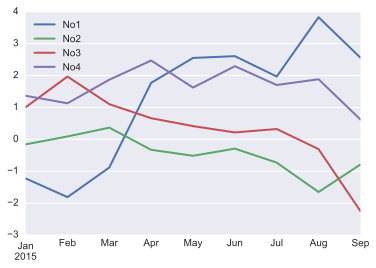

In [67]:
%matplotlib inline
df.cumsum().plot(lw=2., grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [68]:
type(df)

pandas.core.frame.DataFrame

In [69]:
df['No1']

2015-01-31   -1.226468
2015-02-28   -0.586771
2015-03-31    0.928865
2015-04-30    2.657158
2015-05-31    0.779088
2015-06-30    0.056451
2015-07-31   -0.639803
2015-08-31    1.859406
2015-09-30   -1.267576
Freq: M, Name: No1, dtype: float64

In [70]:
type(df['No1'])

pandas.core.series.Series

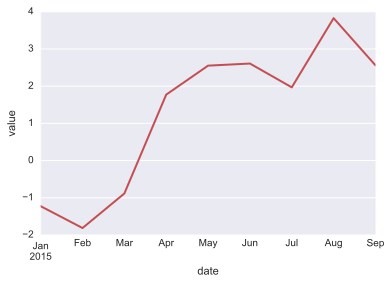

In [71]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [72]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-1.226468,-0.157540,1.005136,1.365524,Q1
2015-02-28,-0.586771,0.247500,0.963079,-0.235757,Q1
2015-03-31,0.928865,0.275766,-0.866069,0.739908,Q1
2015-04-30,2.657158,-0.695495,-0.440870,0.602237,Q2
2015-05-31,0.779088,-0.186620,-0.247307,-0.849306,Q2
2015-06-30,0.056451,0.224022,-0.197717,0.670265,Q2
2015-07-31,-0.639803,-0.438599,0.106562,-0.589353,Q3
2015-08-31,1.859406,-0.921390,-0.630209,0.180301,Q3
2015-09-30,-1.267576,0.863280,-1.942993,-1.261716,Q3


In [75]:
groups = df.groupby('Quarter')
groups

In [76]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.294791,0.121909,0.367382,0.623225
Q2,1.164232,-0.219364,-0.295298,0.141065
Q3,-0.015991,-0.165569,-0.822213,-0.556923


In [77]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.928865,0.275766,1.005136,1.365524
Q2,2.657158,0.224022,-0.197717,0.670265
Q3,1.859406,0.863280,0.106562,0.180301


In [78]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [80]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                 'Odd', 'Even', 'Odd']

In [81]:
groups = df.groupby(['Quarter', 'Odd_Even'])
groups = df.groupby(['Quarter', 'Odd_Even'])

In [82]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [85]:
groups.mean()
groups

## Financial Data

In [87]:
import pandas.io.data as web

In [88]:
DOW = web.DataReader(name='^DJI', data_source='yahoo',
                    start='2000-1-1')
DOW.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4172 entries, 2000-01-03 to 2016-08-02
Data columns (total 6 columns):
Open         4172 non-null float64
High         4172 non-null float64
Low          4172 non-null float64
Close        4172 non-null float64
Volume       4172 non-null int64
Adj Close    4172 non-null float64
dtypes: float64(5), int64(1)
memory usage: 228.2 KB


In [89]:
DOW.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-27,18473.269531,18542.390625,18430.939453,18472.169922,111370000,18472.169922
2016-07-28,18461.009766,18483.259766,18368.820312,18456.349609,85750000,18456.349609
2016-07-29,18442.519531,18466.550781,18371.119141,18432.240234,111550000,18432.240234
2016-08-01,18434.500000,18467.029297,18355.750000,18404.509766,83470000,18404.509766
2016-08-02,18401.150391,18403.650391,18247.789062,18313.769531,89680000,18313.769531


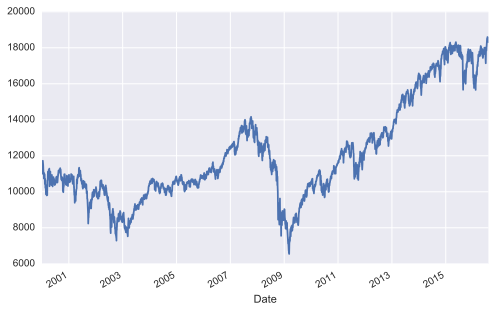

In [90]:
DOW['Close'].plot(figsize=(8,5), grid=True)
# tag:Dow
# title: Historical Dow index levels

In [92]:
%%time
DOW['Ret_Loop'] = 0.0
for i in range(1, len(DOW)):
    DOW['Ret_Loop'][i] = np.log(DOW['Close'][i] / DOW['Close'][i - 1])
DOW.tail()

CPU times: user 2min 39s, sys: 0 ns, total: 2min 39s
Wall time: 2min 39s


In [93]:
DOW.tail()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop
Date,,,,,,,
2016-07-27,18473.269531,18542.390625,18430.939453,18472.169922,111370000,18472.169922,-0.000086
2016-07-28,18461.009766,18483.259766,18368.820312,18456.349609,85750000,18456.349609,-0.000857
2016-07-29,18442.519531,18466.550781,18371.119141,18432.240234,111550000,18432.240234,-0.001307
2016-08-01,18434.500000,18467.029297,18355.750000,18404.509766,83470000,18404.509766,-0.001506
2016-08-02,18401.150391,18403.650391,18247.789062,18313.769531,89680000,18313.769531,-0.004943


In [94]:
%time DOW['Return'] = np.log(DOW['Close'] / DOW['Close'].shift(1))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.37 ms


In [95]:
DOW.tail()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop,Return
Date,,,,,,,,
2016-07-27,18473.269531,18542.390625,18430.939453,18472.169922,111370000,18472.169922,-0.000086,-0.000086
2016-07-28,18461.009766,18483.259766,18368.820312,18456.349609,85750000,18456.349609,-0.000857,-0.000857
2016-07-29,18442.519531,18466.550781,18371.119141,18432.240234,111550000,18432.240234,-0.001307,-0.001307
2016-08-01,18434.500000,18467.029297,18355.750000,18404.509766,83470000,18404.509766,-0.001506,-0.001506
2016-08-02,18401.150391,18403.650391,18247.789062,18313.769531,89680000,18313.769531,-0.004943,-0.004943


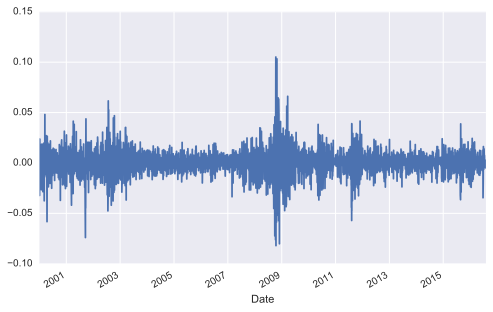

In [96]:
DOW['Return'].plot(figsize=(8,5), grid=True)

In [97]:
DOW.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4172 entries, 2000-01-03 to 2016-08-02
Data columns (total 8 columns):
Open         4172 non-null float64
High         4172 non-null float64
Low          4172 non-null float64
Close        4172 non-null float64
Volume       4172 non-null int64
Adj Close    4172 non-null float64
Ret_Loop     4172 non-null float64
Return       4171 non-null float64
dtypes: float64(7), int64(1)
memory usage: 293.3 KB


In [98]:
DOW.describe()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop,Return
count,4172.000000,4172.000000,4172.000000,4172.000000,4.172000e+03,4172.000000,4172.000000,4171.000000
mean,12050.013979,12126.059942,11971.008116,12052.377691,2.035589e+08,12052.377691,0.000115,0.000115
std,2790.168193,2788.607382,2791.590461,2791.467655,8.960134e+07,2791.467655,0.011770,0.011771
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,-0.082005,-0.082005
25%,10238.502197,10304.917724,10172.234619,10238.789795,1.345175e+08,10238.789795,-0.005121,NaN
50%,11104.375000,11177.640137,11018.515137,11103.629883,2.003650e+08,11103.629883,0.000447,NaN
75%,13329.762451,13413.669922,13261.357422,13334.427246,2.529100e+08,13334.427246,0.005708,NaN
max,18589.960938,18622.009766,18555.650391,18595.029297,7.384400e+08,18595.029297,0.105083,0.105083


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45c00fd110>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45c00bc150>], dtype=object)

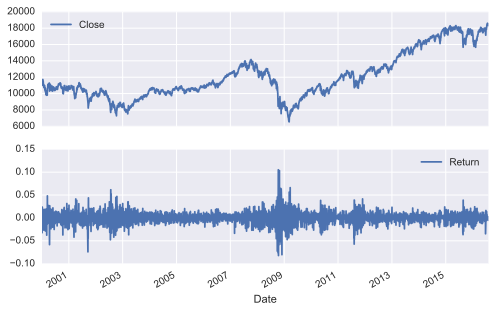

In [100]:
DOW[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8, 5), grid=True)

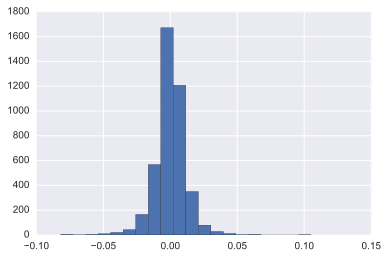

In [106]:
DOW['Return'].hist(bins=20)

In [107]:
DOW.head()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop,Return
Date,,,,,,,,
2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,169750000,11357.509766,0.000000,NaN
2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,178420000,10997.929688,-0.032172,-0.032172
2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,203190000,11122.650391,0.011277,0.011277
2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,176550000,11253.259766,0.011674,0.011674
2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,184900000,11522.559570,0.023649,0.023649


In [108]:
%time DOW['4dReturn'] = np.log(DOW['Close'] / DOW['Close'].shift(4))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.72 ms


In [109]:
DOW.tail()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop,Return,4dReturn
Date,,,,,,,,,
2016-07-27,18473.269531,18542.390625,18430.939453,18472.169922,111370000,18472.169922,-0.000086,-0.000086,-0.002436
2016-07-28,18461.009766,18483.259766,18368.820312,18456.349609,85750000,18456.349609,-0.000857,-0.000857,-0.006185
2016-07-29,18442.519531,18466.550781,18371.119141,18432.240234,111550000,18432.240234,-0.001307,-0.001307,-0.003294
2016-08-01,18434.500000,18467.029297,18355.750000,18404.509766,83470000,18404.509766,-0.001506,-0.001506,-0.003755
2016-08-02,18401.150391,18403.650391,18247.789062,18313.769531,89680000,18313.769531,-0.004943,-0.004943,-0.008612


In [110]:
DOW.describe()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop,Return,4dReturn
count,4172.000000,4172.000000,4172.000000,4172.000000,4.172000e+03,4172.000000,4172.000000,4171.000000,4168.000000
mean,12050.013979,12126.059942,11971.008116,12052.377691,2.035589e+08,12052.377691,0.000115,0.000115,0.000478
std,2790.168193,2788.607382,2791.590461,2791.467655,8.960134e+07,2791.467655,0.011770,0.011771,0.021826
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,-0.082005,-0.082005,-0.185265
25%,10238.502197,10304.917724,10172.234619,10238.789795,1.345175e+08,10238.789795,-0.005121,NaN,NaN
50%,11104.375000,11177.640137,11018.515137,11103.629883,2.003650e+08,11103.629883,0.000447,NaN,NaN
75%,13329.762451,13413.669922,13261.357422,13334.427246,2.529100e+08,13334.427246,0.005708,NaN,NaN
max,18589.960938,18622.009766,18555.650391,18595.029297,7.384400e+08,18595.029297,0.105083,0.105083,0.144526


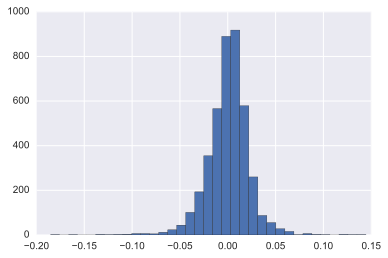

In [114]:
DOW['4dReturn'].hist(bins=35)

In [115]:
%time DOW['tradReturn'] = DOW['Close'] / DOW['Close'].shift(1) - 1.

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.86 ms


In [116]:
DOW.tail()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop,Return,4dReturn,tradReturn
Date,,,,,,,,,,
2016-07-27,18473.269531,18542.390625,18430.939453,18472.169922,111370000,18472.169922,-0.000086,-0.000086,-0.002436,-0.000086
2016-07-28,18461.009766,18483.259766,18368.820312,18456.349609,85750000,18456.349609,-0.000857,-0.000857,-0.006185,-0.000856
2016-07-29,18442.519531,18466.550781,18371.119141,18432.240234,111550000,18432.240234,-0.001307,-0.001307,-0.003294,-0.001306
2016-08-01,18434.500000,18467.029297,18355.750000,18404.509766,83470000,18404.509766,-0.001506,-0.001506,-0.003755,-0.001504
2016-08-02,18401.150391,18403.650391,18247.789062,18313.769531,89680000,18313.769531,-0.004943,-0.004943,-0.008612,-0.004930


In [117]:
DOW['Return'].describe()

count    4171.000000
mean        0.000115
std         0.011771
min        -0.082005
25%              NaN
50%              NaN
75%              NaN
max         0.105083
Name: Return, dtype: float64

In [118]:
DOW['42d'] = pd.rolling_mean(DOW['Close'], window=42)
DOW['252d'] = pd.rolling_mean(DOW['Close'], window=252)

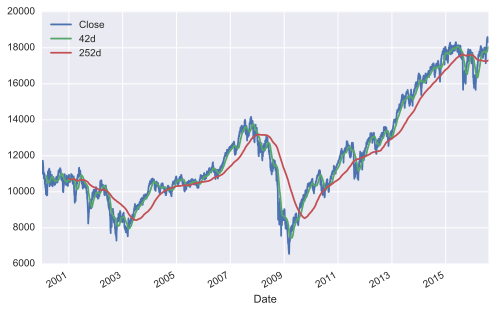

In [120]:
DOW[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)

In [49]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo',
                     start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3975 entries, 2000-01-03 to 2015-08-07
Data columns (total 6 columns):
Open         3975 non-null float64
High         3975 non-null float64
Low          3975 non-null float64
Close        3975 non-null float64
Volume       3975 non-null int64
Adj Close    3975 non-null float64
dtypes: float64(5), int64(1)
memory usage: 217.4 KB


In [50]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-03,11295.500000,11460.400391,11248.269531,11443.719727,77981000,11443.719727
2015-08-04,11408.230469,11476.900391,11380.809570,11456.070312,66699900,11456.070312
2015-08-05,11503.209961,11655.740234,11497.919922,11636.299805,73800000,11636.299805
2015-08-06,11605.589844,11669.860352,11574.969727,11585.099609,67470900,11585.099609
2015-08-07,11561.370117,11582.900391,11484.849609,11490.830078,60211600,11490.830078


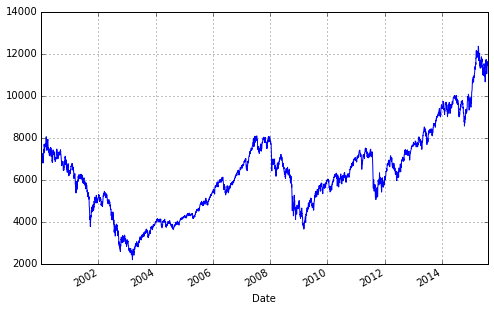

In [51]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

In [52]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

CPU times: user 27 ms, sys: 0 ns, total: 27 ms
Wall time: 26.6 ms


In [53]:
DAX[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2015-08-03,11443.719727,0.011843,0.011843
2015-08-04,11456.070312,0.001079,0.001079
2015-08-05,11636.299805,0.015610,0.015610
2015-08-06,11585.099609,-0.004410,-0.004410
2015-08-07,11490.830078,-0.008170,-0.008170


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45db498210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45db382190>], dtype=object)

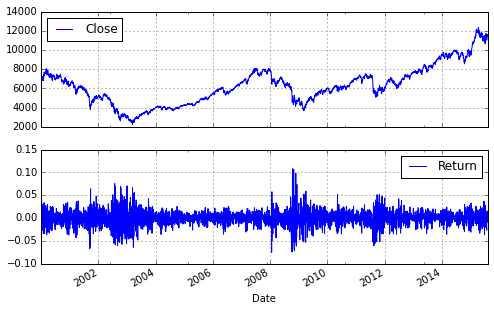

In [54]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

In [55]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)

In [56]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2015-08-03,11443.719727,11255.769485,10515.471021
2015-08-04,11456.070312,11261.934245,10524.383681
2015-08-05,11636.299805,11275.538528,10534.233522
2015-08-06,11585.099609,11289.438756,10543.738917
2015-08-07,11490.830078,11294.806385,10553.107131


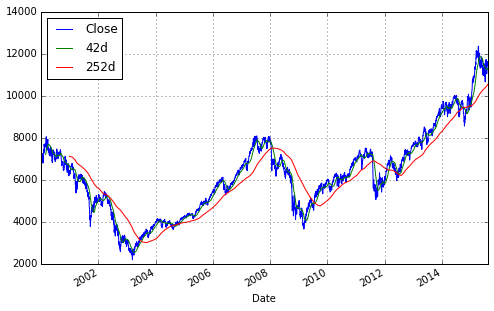

In [57]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [121]:
import math
DOW['Mov_Vol'] = pd.rolling_std(DOW['Return'], window=252)*math.sqrt(252)

#moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45b9f65f50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45b9fac050>], dtype=object)

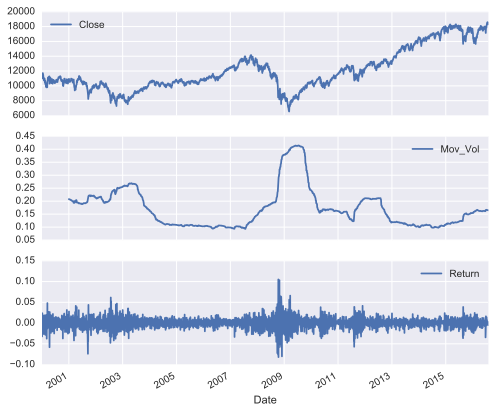

In [122]:
DOW[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dow_mov_std
# title: The DOW index and moving, annualized volatility

In [124]:
DOW['Volproxy'] = (DOW['High'] - DOW['Low']) / DOW['Close']

In [125]:
DOW.tail()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop,Return,4dReturn,tradReturn,42d,252d,Mov_Vol,Volproxy
Date,,,,,,,,,,,,,,
2016-07-27,18473.269531,18542.390625,18430.939453,18472.169922,111370000,18472.169922,-0.000086,-0.000086,-0.002436,-0.000086,18004.823103,17286.985623,0.164692,0.006033
2016-07-28,18461.009766,18483.259766,18368.820312,18456.349609,85750000,18456.349609,-0.000857,-0.000857,-0.006185,-0.000856,18018.707124,17289.783079,0.164559,0.006201
2016-07-29,18442.519531,18466.550781,18371.119141,18432.240234,111550000,18432.240234,-0.001307,-0.001307,-0.003294,-0.001306,18034.065244,17292.506332,0.164565,0.005177
2016-08-01,18434.500000,18467.029297,18355.750000,18404.509766,83470000,18404.509766,-0.001506,-0.001506,-0.003755,-0.001504,18048.704288,17295.342246,0.164540,0.006046
2016-08-02,18401.150391,18403.650391,18247.789062,18313.769531,89680000,18313.769531,-0.004943,-0.004943,-0.008612,-0.004930,18060.018787,17298.181811,0.164532,0.008511


In [126]:
DOW.describe()

,Open,High,Low,Close,Volume,Adj Close,Ret_Loop,Return,4dReturn,tradReturn,42d,252d,Mov_Vol,Volproxy
count,4172.000000,4172.000000,4172.000000,4172.000000,4.172000e+03,4172.000000,4172.000000,4171.000000,4168.000000,4171.000000,4131.000000,3921.000000,3920.000000,4172.000000
mean,12050.013979,12126.059942,11971.008116,12052.377691,2.035589e+08,12052.377691,0.000115,0.000115,0.000478,0.000184,12026.248611,11918.833610,0.170745,0.013658
std,2790.168193,2788.607382,2791.590461,2791.467655,8.960134e+07,2791.467655,0.011770,0.011771,0.021826,0.011773,2754.263129,2602.001053,0.076155,0.009946
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,-0.082005,-0.082005,-0.185265,-0.078733,7432.297142,8426.345116,0.093111,0.001665
25%,10238.502197,10304.917724,10172.234619,10238.789795,1.345175e+08,10238.789795,-0.005121,NaN,NaN,NaN,NaN,NaN,NaN,0.007530
50%,11104.375000,11177.640137,11018.515137,11103.629883,2.003650e+08,11103.629883,0.000447,NaN,NaN,NaN,NaN,NaN,NaN,0.011166
75%,13329.762451,13413.669922,13261.357422,13334.427246,2.529100e+08,13334.427246,0.005708,NaN,NaN,NaN,NaN,NaN,NaN,0.016734
max,18589.960938,18622.009766,18555.650391,18595.029297,7.384400e+08,18595.029297,0.105083,0.105083,0.144526,0.110803,18061.117327,17638.519814,0.414708,0.120548


In [127]:
DOW['Volproxy'].describe()

count    4172.000000
mean        0.013658
std         0.009946
min         0.001665
25%         0.007530
50%         0.011166
75%         0.016734
max         0.120548
Name: Volproxy, dtype: float64

In [58]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],
                                window=252) * math.sqrt(252)
  # moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45db1e86d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45db075110>], dtype=object)

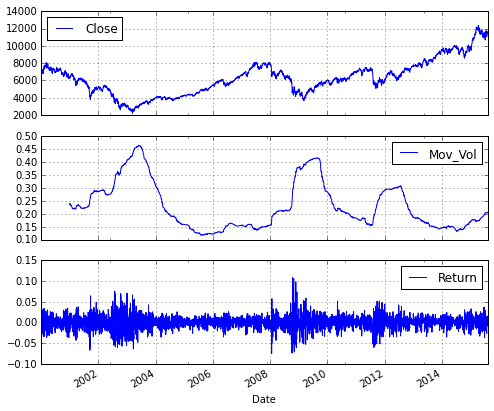

In [59]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

## Regression Analysis

In [128]:
from urllib import urlretrieve

In [129]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt

-rw-r--r-- 1 dockeruser 678399 Aug  3 08:22 ./data/es.txt
-rw-r--r-- 1 dockeruser 363485 Aug  3 08:22 ./data/vs.txt


In [130]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [132]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [134]:
for line in lines[3883:3890]:
    print(line[41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [136]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [137]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [141]:
for line in new_lines[3880:3887]:
    print(line[41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [142]:
new_lines[3880:3887]

['20.12.2001;3537.34;3617.47;286.07;300.97;317.10;267.23;5268.36;363.19\n',
 '21.12.2001;3616.80;3696.44;291.39;306.60;322.55;272.18;5360.52;370.94\n',
 '24.12.2001;3622.85;3696.98;291.90;306.77;322.69;272.95;5360.52;370.94\n',
 '27.12.2001;3686.23;3778.39;297.11;312.43;327.57;277.68;5479.59;378.69;\n',
 '28.12.2001;3706.93;3806.13;298.73;314.52;329.94;278.87;5585.35;386.99;\n',
 '02.01.2002;3627.81;3755.56;293.69;311.43;326.77;272.38;5522.25;380.09;\n',
 '03.01.2002;3699.09;3833.09;299.09;317.54;332.62;277.08;5722.57;396.12;\n']

In [138]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [139]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-04-26,2923.0,3121.0,347.0,330.0,412.0,354.0,9395.0,588.0,NaN
2016-04-27,2927.0,3130.0,348.0,332.0,413.0,354.0,9424.0,589.0,NaN
2016-04-28,2932.0,3125.0,349.0,332.0,414.0,355.0,9459.0,592.0,NaN
2016-04-29,2856.0,3028.0,341.0,324.0,405.0,349.0,9278.0,582.0,NaN
2016-05-02,2852.0,3033.0,341.0,324.0,405.0,348.0,9238.0,579.0,NaN


In [143]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7562 entries, 1986-12-31 to 2016-05-02
Data columns (total 8 columns):
SX5P    7562 non-null float64
SX5E    7562 non-null float64
SXXP    7562 non-null float64
SXXE    7562 non-null float64
SXXF    7562 non-null float64
SXXA    7562 non-null float64
DK5F    7562 non-null float64
DKXF    7562 non-null float64
dtypes: float64(8)
memory usage: 531.7 KB


In [144]:
es_test = pd.read_csv('./data/es.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

CParserError: Error tokenizing data. C error: Expected 9 fields in line 3887, saw 10


In [145]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es_test = pd.read_csv('./data/es.txt', index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [146]:
es_test.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-04-26,2922.57,3121.29,347.31,330.30,411.75,353.79,9395.03,587.73
2016-04-27,2927.31,3130.43,348.32,331.69,413.25,354.41,9424.15,589.23
2016-04-28,2932.00,3125.43,348.90,331.76,413.78,355.47,9459.04,591.95
2016-04-29,2856.28,3028.21,341.48,323.70,404.71,348.87,9278.19,581.67
2016-05-02,2852.10,3032.60,341.24,324.22,404.91,347.90,9238.16,578.79


In [60]:
import pandas as pd
from urllib import urlretrieve

In [61]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt
# Windows: use dir

-rw-r--r-- 1 trial_yves 661200 Aug  8 11:37 ./data/es.txt
-rw-r--r-- 1 trial_yves 352571 Aug  8 11:37 ./data/vs.txt


In [62]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [63]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [64]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [65]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [66]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [67]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [68]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2015-08-03,3456,3635,399,375,470,412,10729,646,NaN
2015-08-04,3449,3619,399,374,468,411,10687,644,NaN
2015-08-05,3501,3677,404,379,473,417,10782,649,NaN
2015-08-06,3472,3668,401,378,471,412,10637,641,NaN
2015-08-07,3441,3638,397,375,466,408,10520,633,NaN


In [69]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7373 entries, 1986-12-31 to 2015-08-07
Data columns (total 8 columns):
SX5P    7373 non-null float64
SX5E    7373 non-null float64
SXXP    7373 non-null float64
SXXE    7373 non-null float64
SXXF    7373 non-null float64
SXXA    7373 non-null float64
DK5F    7373 non-null float64
DKXF    7373 non-null float64
dtypes: float64(8)
memory usage: 518.4 KB


In [70]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [71]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2015-08-03,3456.29,3635.40,399.44,374.80,469.70,411.85,10728.61,646.17
2015-08-04,3448.82,3619.31,398.75,373.94,468.45,411.34,10686.96,644.50
2015-08-05,3501.11,3676.75,403.93,378.75,473.48,416.71,10781.72,649.46
2015-08-06,3471.95,3668.47,400.70,377.67,470.56,411.54,10637.46,640.67
2015-08-07,3441.25,3637.80,397.07,374.54,466.37,407.53,10520.07,633.10


In [147]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [148]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4443 non-null float64
VSTOXX       4356 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [150]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4443 non-null float64
VSTOXX       4443 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [151]:
data.tail()

,EUROSTOXX,VSTOXX
date,,
2016-04-26,3121.29,35.6846
2016-04-27,3130.43,35.6846
2016-04-28,3125.43,35.6846
2016-04-29,3028.21,35.6846
2016-05-02,3032.60,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45b9b605d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45b9435e10>], dtype=object)

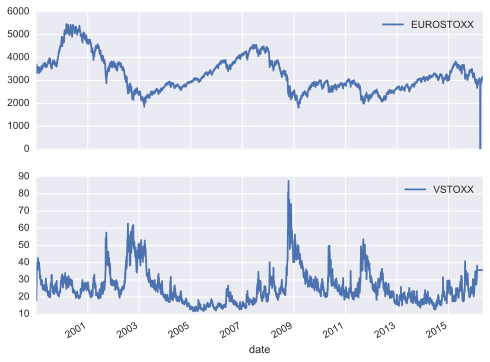

In [152]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [72]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4226 entries, 1999-01-04 to 2015-08-07
Data columns (total 9 columns):
V2TX    4226 non-null float64
V6I1    3787 non-null float64
V6I2    4226 non-null float64
V6I3    4169 non-null float64
V6I4    4226 non-null float64
V6I5    4226 non-null float64
V6I6    4210 non-null float64
V6I7    4226 non-null float64
V6I8    4213 non-null float64
dtypes: float64(9)
memory usage: 330.2 KB


In [73]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [74]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4254 entries, 1999-01-04 to 2015-08-07
Data columns (total 2 columns):
EUROSTOXX    4254 non-null float64
VSTOXX       4254 non-null float64
dtypes: float64(2)
memory usage: 99.7 KB


In [75]:
data.tail()

,EUROSTOXX,VSTOXX
2015-08-03,3635.40,18.5935
2015-08-04,3619.31,18.2536
2015-08-05,3676.75,17.5482
2015-08-06,3668.47,18.2603
2015-08-07,3637.80,18.7066


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45dae75610>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45dac5e610>], dtype=object)

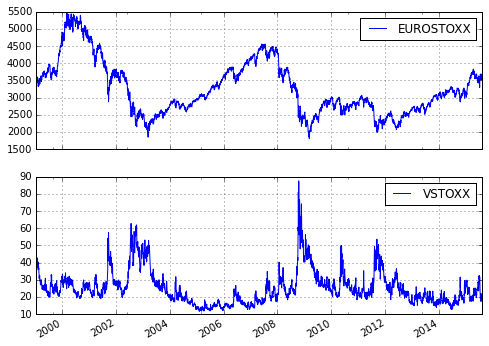

In [76]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [77]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [160]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv('./data/es.txt', index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [161]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [162]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [177]:
sx = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})

sx[(sx.index > dt.datetime(2016, 3, 22)) & (sx.index < dt.datetime(2016, 3, 31))]

,EUROSTOXX
2016-03-23,3042.42
2016-03-24,2986.73
2016-03-25,0.00
2016-03-28,0.00
2016-03-29,3004.87
2016-03-30,3044.10


In [193]:
sx = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})

In [200]:
sx.loc[sx['EUROSTOXX'] < 0.1, 'EUROSTOXX'] = np.nan

In [191]:
# sx[sx['EUROSTOXX'].apply(lambda x: x <0.1)] = np.nan

In [201]:
sx[(sx.index > dt.datetime(2016, 3, 22)) & (sx.index < dt.datetime(2016, 3, 31))]

,EUROSTOXX
2016-03-23,3042.42
2016-03-24,2986.73
2016-03-25,NaN
2016-03-28,NaN
2016-03-29,3004.87
2016-03-30,3044.10


In [202]:
data = sx.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [203]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4443 non-null float64
VSTOXX       4443 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [204]:
data.head()

,EUROSTOXX,VSTOXX
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296


In [205]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [206]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4442 non-null float64
VSTOXX       4442 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [207]:
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [208]:
rets[(rets.index > dt.datetime(2016, 3, 22)) & (rets.index < dt.datetime(2016, 3, 31))]

,EUROSTOXX,VSTOXX
2016-03-23,-0.002892,0.0
2016-03-24,-0.018474,0.0
2016-03-25,0.000000,0.0
2016-03-28,0.000000,0.0
2016-03-29,0.006055,0.0
2016-03-30,0.012971,0.0


In [163]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4443 non-null float64
VSTOXX       4443 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [164]:
rets = np.log(data / data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [172]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4441 non-null float64
VSTOXX       4442 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [209]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4442
Number of Degrees of Freedom:   2

R-squared:         0.5376
Adj R-squared:     0.5374

Rmse:              0.0393

F-stat (1, 4440):  5161.0484, p-value:     0.0000

Degrees of Freedom: model 1, resid 4440

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.8168     0.0392     -71.84     0.0000    -2.8936    -2.7399
     intercept     0.0001     0.0006       0.09     0.9286    -0.0011     0.0012
---------------------------------End of Summary---------------------------------

In [210]:
model.beta

x           -2.816760
intercept    0.000053
dtype: float64

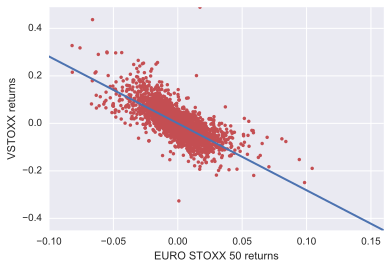

In [211]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [ ]:
# 아래 EUROSTOXX 데이터 중 이틀에 NaN 이 아니라 0 이 들어 있어 발생하는 문제가 있음.  위의 내용은 이를 처리하고 다시 작업한 것임.

In [173]:
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [171]:
print(rets[np.isinf(rets)].to_string())

            EUROSTOXX  VSTOXX
1999-01-04        NaN     NaN
1999-01-05        NaN     NaN
1999-01-06        NaN     NaN
1999-01-07        NaN     NaN
1999-01-08        NaN     NaN
1999-01-11        NaN     NaN
1999-01-12        NaN     NaN
1999-01-13        NaN     NaN
1999-01-14        NaN     NaN
1999-01-15        NaN     NaN
1999-01-18        NaN     NaN
1999-01-19        NaN     NaN
1999-01-20        NaN     NaN
1999-01-21        NaN     NaN
1999-01-22        NaN     NaN
1999-01-25        NaN     NaN
1999-01-26        NaN     NaN
1999-01-27        NaN     NaN
1999-01-28        NaN     NaN
1999-01-29        NaN     NaN
1999-02-01        NaN     NaN
1999-02-02        NaN     NaN
1999-02-03        NaN     NaN
1999-02-04        NaN     NaN
1999-02-05        NaN     NaN
1999-02-08        NaN     NaN
1999-02-09        NaN     NaN
1999-02-10        NaN     NaN
1999-02-11        NaN     NaN
1999-02-12        NaN     NaN
1999-02-15        NaN     NaN
1999-02-16        NaN     NaN
1999-02-17

In [175]:
rets[(rets.index > dt.datetime(2016, 3, 22)) & (rets.index < dt.datetime(2016, 3, 31))]
# 이러한 zero 값 처리가 위에 있음.  여기서 문제를 발견하고 다시 데이터 작업 했음.

,EUROSTOXX,VSTOXX
2016-03-23,-0.002892,0.0
2016-03-24,-0.018474,0.0
2016-03-25,-inf,0.0
2016-03-28,NaN,0.0
2016-03-29,inf,0.0
2016-03-30,0.012971,0.0


In [176]:
data[(data.index > dt.datetime(2016, 3, 22)) & (data.index < dt.datetime(2016, 3, 31))]

,EUROSTOXX,VSTOXX
2016-03-23,3042.42,35.6846
2016-03-24,2986.73,35.6846
2016-03-25,0.00,35.6846
2016-03-28,0.00,35.6846
2016-03-29,3004.87,35.6846
2016-03-30,3044.10,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45baebe290>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45b8f10290>], dtype=object)

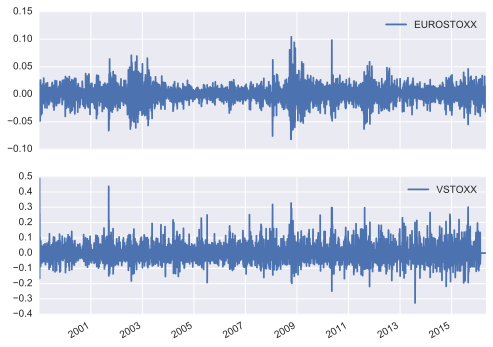

In [165]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [168]:
xdat = rets['EUROSTOXX'][1:]
ydat = rets['VSTOXX'][1:]
model = pd.ols(y=ydat, x=xdat)
model

ValueError: array must not contain infs or NaNs

In [169]:
xdat.head()

1999-01-05    0.017228
1999-01-06    0.022138
1999-01-07   -0.015723
1999-01-08   -0.003120
1999-01-11   -0.019593
Name: EUROSTOXX, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45dab79a10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45dab329d0>], dtype=object)

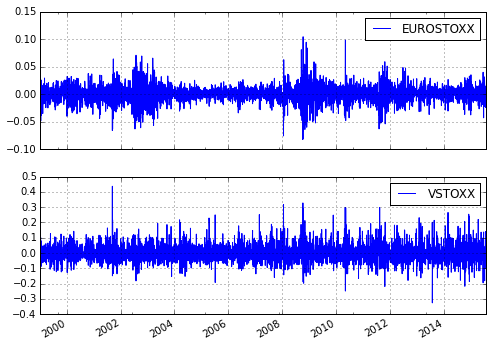

In [78]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [79]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4253
Number of Degrees of Freedom:   2

R-squared:         0.5335
Adj R-squared:     0.5334

Rmse:              0.0394

F-stat (1, 4251):  4861.3892, p-value:     0.0000

Degrees of Freedom: model 1, resid 4251

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.8064     0.0403     -69.72     0.0000    -2.8853    -2.7276
     intercept     0.0000     0.0006       0.04     0.9685    -0.0012     0.0012
---------------------------------End of Summary---------------------------------

In [80]:
model.beta

x           -2.806444
intercept    0.000024
dtype: float64

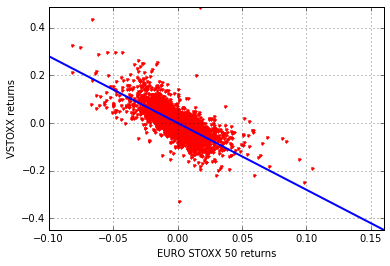

In [81]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [ ]:
# 여기서 다시 이어짐

In [212]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.733178
VSTOXX,-0.733178,1.000000


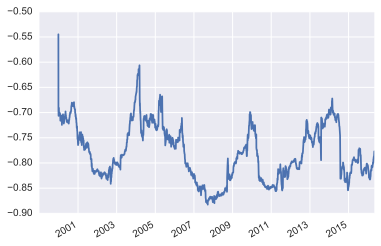

In [213]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
                window=252).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data

In [84]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline

In [85]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [86]:
year = '2015'
month = '08'
days = ['03', '04', '05', '06', '07']
  # dates might need to be updated

In [87]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [88]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50962 entries, 2015-08-03 10:00:01 to 2015-08-07 22:00:00
Data columns (total 6 columns):
bid        50962 non-null float64
bdepth     50962 non-null int64
bdeptht    50962 non-null int64
offer      50962 non-null float64
odepth     50962 non-null int64
odeptht    50962 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.7 MB


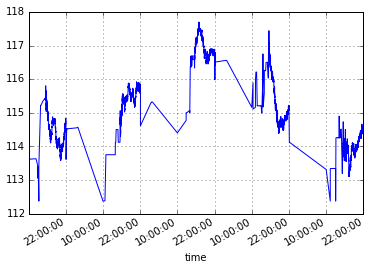

In [89]:
NKE['bid'].plot(grid=True)
# tag: aapl
# title: Nike stock tick data for a week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45cf36ad10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45cebced50>], dtype=object)

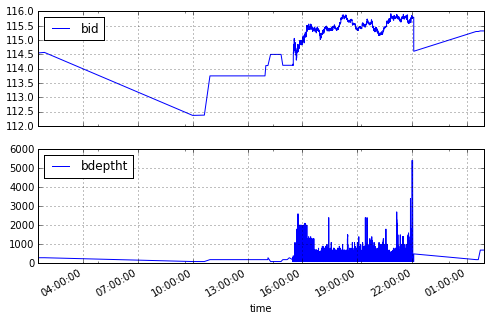

In [90]:
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2015, 8, 4, 0, 0))
 &  (NKE.index < dt.datetime(2015, 8, 5, 2, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)
# tag: aapl_day
# title: Apple stock tick data and volume for a trading day

In [91]:
NKE_resam = NKE.resample(rule='5min', how='mean')
np.round(NKE_resam.head(), 2)

,bid,bdepth,bdeptht,offer,odepth,odeptht
time,,,,,,
2015-08-03 10:00:00,113.56,100,100,116.82,100,100
2015-08-03 10:05:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 10:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 10:20:00,NaN,NaN,NaN,NaN,NaN,NaN


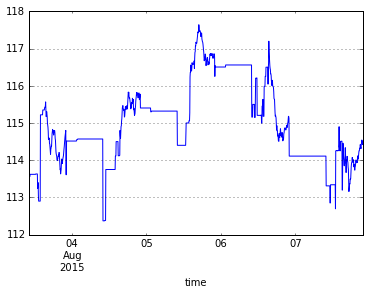

In [92]:
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)
# tag: aapl_resam
# title: Resampled Apple stock tick data

In [93]:
def reversal(x):
    return 2 * 95 - x

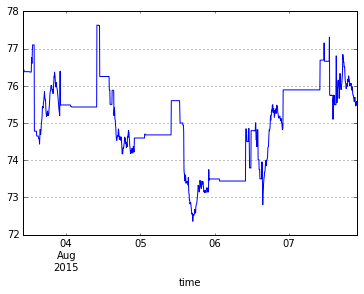

In [94]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# tag: aapl_resam_apply
# title: Resampled Apple stock tick data with function applied to it

In [95]:
!rm ./data/*
  # Windows: del /data/*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>